In [ ]:
globals().clear
import time
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from datetime import datetime

In [ ]:
# Install Libraries

# mount Google Drive
from google.colab import drive
drive.mount('/content/colabIntern')

%cd "/content/colabIntern/MyDrive/Capstone/Capstone Project/Collab"
!ls | wc -l

Mounted at /content/colabIntern
/content/colabIntern/.shortcut-targets-by-id/1_cBH5e_TBWyCYfxXIK1yDOdiYjVxi7ae/Capstone Project/Collab
9


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load Dataset
df = pd.read_csv('df.csv')

In [ ]:
# list of tickers for stocks in our data set. Sort the ticker list since our df will be alphabetically arranged.
tickers = ["AAPL", 'XOM', 'IBM', 'KO', 'CVX', 'BA', 'PFE', 'MSFT', 'T', 'WMT',
       'F', 'NFLX', 'JPM', 'MCD', 'GE', 'NVDA', 'JNJ', 'BAC', 'C', 'AMZN',
       'INTC', 'CSCO', 'TSLA', 'GOOGL', 'AMD', 'BABA', 'VZ', 'DIS',
       'META']
tickers.sort()

In [ ]:
# For this specific trial drop PLTR since data is not complete
df = df[df.stock_ID != "PLTR"]


In [ ]:
# limit the date ranges
df.DATETIME=pd.to_datetime(df.DATETIME)

<Axes: >

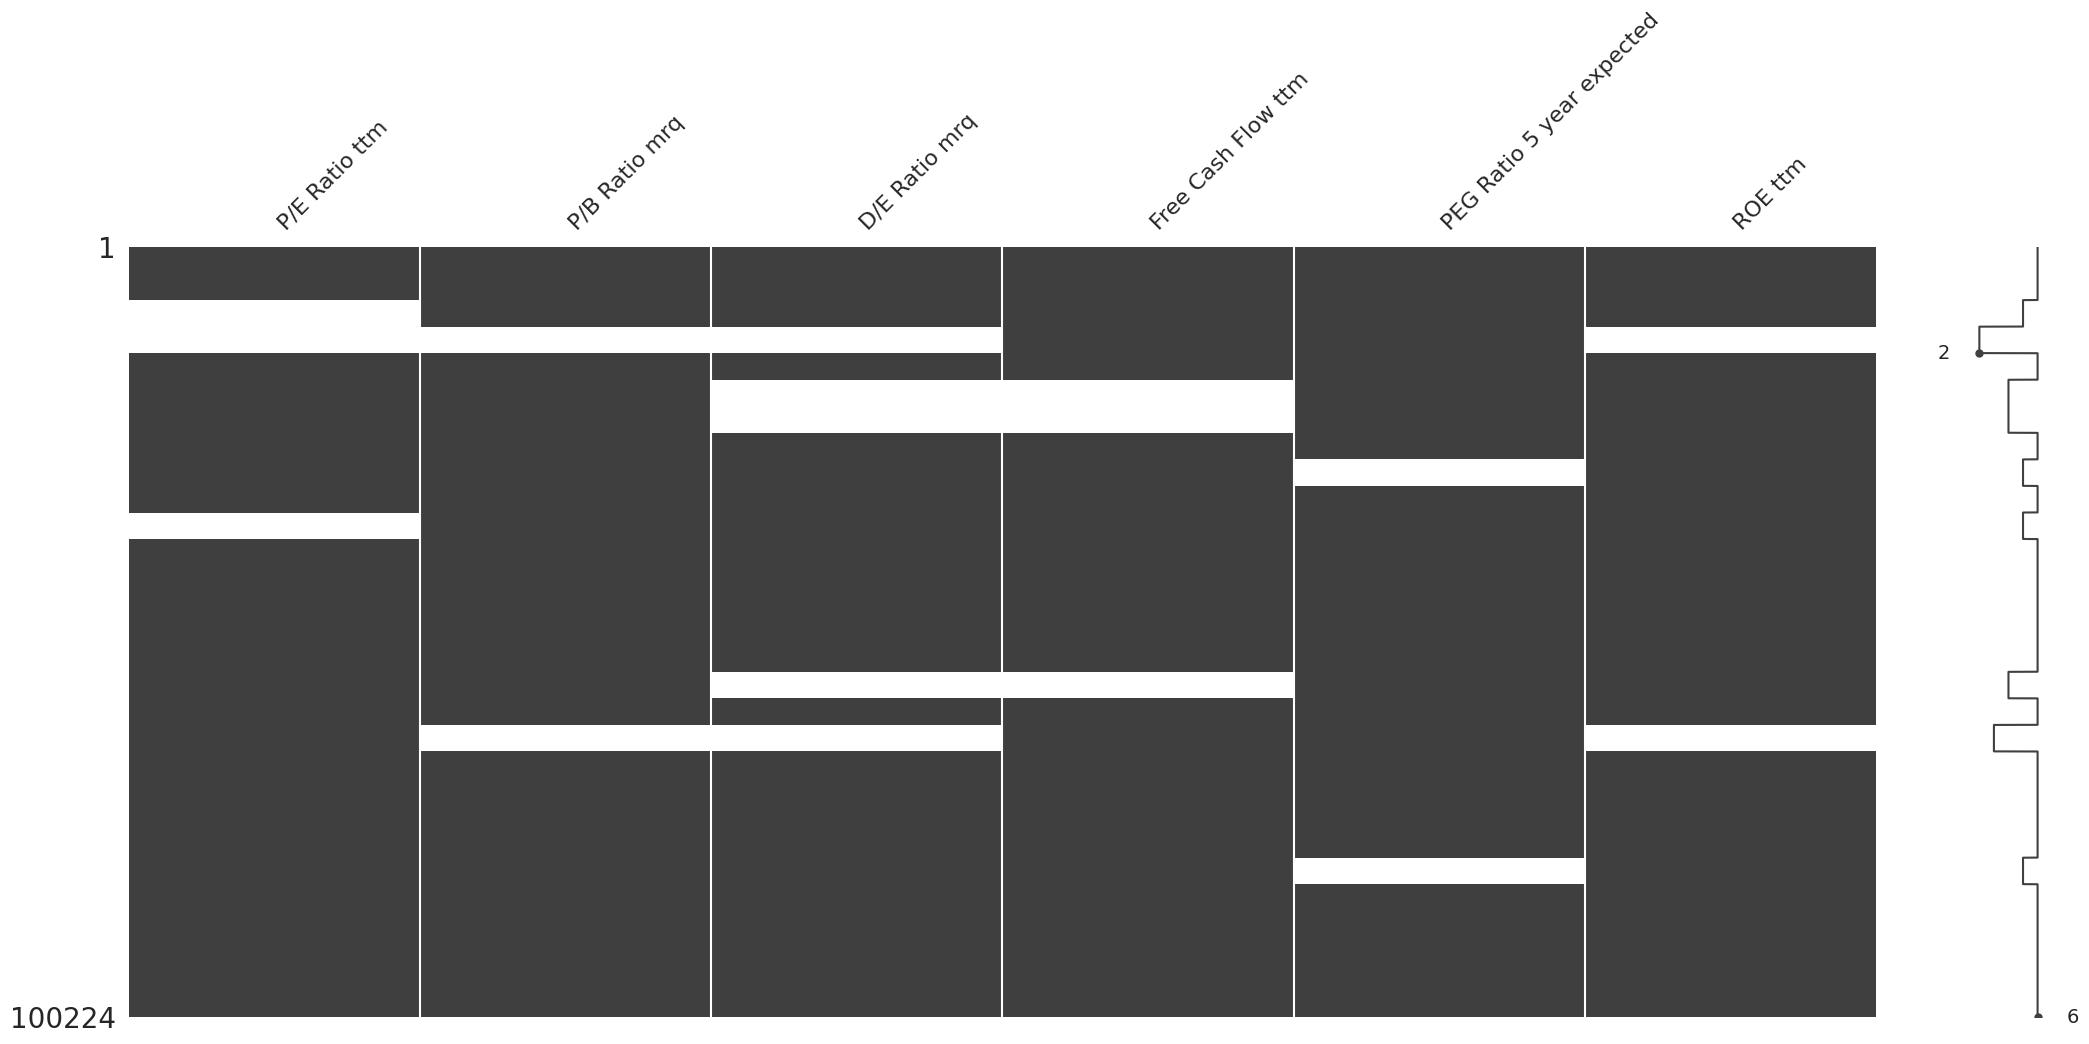

In [ ]:
import missingno as msno
df_f=df.loc[(df['DATETIME']>'2022-06-01')&(df['DATETIME']<'2022-12-30'),:]
msno.matrix(df_f[['P/E Ratio ttm', 'P/B Ratio mrq', 'D/E Ratio mrq',
       'Free Cash Flow ttm', 'PEG Ratio 5 year expected', 'ROE ttm']])

In [ ]:
# without demographics
df = df.iloc[::,:]

In [ ]:
df['DATETIME']= pd.to_datetime(df['DATETIME'], format='%m/%d/%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595080 entries, 0 to 608231
Data columns (total 89 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   stock_ID                       595080 non-null  object        
 1   Close                          595080 non-null  float64       
 2   Volume_PP                      595078 non-null  float64       
 3   DATETIME                       595080 non-null  datetime64[ns]
 4   US2Y_PP                        595080 non-null  float64       
 5   US5Y_PP                        595080 non-null  float64       
 6   US10Y_PP                       595080 non-null  float64       
 7   DJ_PP                          595080 non-null  float64       
 8   NQ_PP                          595080 non-null  float64       
 9   SP_PP                          595080 non-null  float64       
 10  Gold_PP                        595080 non-null  float64       
 11  

In [ ]:
filtro = (pd.isnull(df['D/E Ratio mrq'])) & (pd.isnull(df['Free Cash Flow ttm']))
df[filtro]

,stock_ID,Close,Volume_PP,DATETIME,US2Y_PP,US5Y_PP,US10Y_PP,DJ_PP,NQ_PP,SP_PP,...,Sector_Financial Services,Sector_Healthcare,Sector_Industrial,Sector_Technology,P/E Ratio ttm,P/B Ratio mrq,D/E Ratio mrq,Free Cash Flow ttm,PEG Ratio 5 year expected,ROE ttm
102600,BAC,29.66,11818479.0,2019-07-01 09:30:00,2.07,1.8,2.03,26717.43,8091.16,2964.33,...,1,0,0,0,8.73,0.91,NaN,NaN,4.22,10.13
102601,BAC,29.61,7422542.0,2019-07-01 09:45:00,2.07,1.8,2.03,26717.43,8091.16,2964.33,...,1,0,0,0,8.73,0.91,NaN,NaN,4.22,10.13
102602,BAC,29.56,2906285.0,2019-07-01 10:00:00,2.07,1.8,2.03,26717.43,8091.16,2964.33,...,1,0,0,0,8.73,0.91,NaN,NaN,4.22,10.13
102603,BAC,29.54,2471417.0,2019-07-01 10:15:00,2.07,1.8,2.03,26717.43,8091.16,2964.33,...,1,0,0,0,8.73,0.91,NaN,NaN,4.22,10.13
102604,BAC,29.56,2602945.0,2019-07-01 10:30:00,2.07,1.8,2.03,26717.43,8091.16,2964.33,...,1,0,0,0,8.73,0.91,NaN,NaN,4.22,10.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348835,JPM,133.07,161596.0,2022-12-30 14:15:00,4.22,4.0,3.88,32898.69,10356.36,3805.68,...,1,0,0,0,10.54,1.41,NaN,NaN,3.32,12.85
348836,JPM,132.99,196602.0,2022-12-30 14:30:00,4.26,4.0,3.88,32890.69,10356.59,3805.66,...,1,0,0,0,10.54,1.41,NaN,NaN,3.32,12.85
348837,JPM,133.13,137303.0,2022-12-30 14:45:00,4.26,4.0,3.88,33001.95,10398.81,3819.66,...,1,0,0,0,10.54,1.41,NaN,NaN,3.32,12.85
348838,JPM,133.56,186211.0,2022-12-30 15:00:00,4.26,4.0,3.88,32993.62,10394.97,3818.01,...,1,0,0,0,10.54,1.41,NaN,NaN,3.32,12.85


In [ ]:
# Sort by time so that the first 29 rows occupy the first time value for all the stocks.
# Fill in 0's for missing values for now.
df = df.set_index('DATETIME')
df = df.fillna(0)

In [ ]:
# Select the length of the df ; For this file we need 16 months
# We use the first 12 months to make the first prediction, then shift window
# Then we will repeat this for the next 4 months (Hence total is 16 months needed)
df = df.sort_index().loc['2021-09-01':'2022-12-30']

In [ ]:
#Set the DATETIME for fecha
DATETIME = df.index.values

In [ ]:
# Sort dataframe such that it is both in sequential order, and also in alphabetical order for each day
# (i.e first entry for each time entry should be AAPL, and last should be XOM).
df.sort_values(["DATETIME", "stock_ID"], inplace=True)

In [ ]:
num_companies = 29  # 29 companies in our dataset.
days = 5
step_rows  = 24 * num_companies * days  # 24 time periods per day per stock
total_rows = len(df['2021-09-01':'2022-12-30'])  # Define total length to predict on
train_rows = len(df['2021-09-01':'2022-08-31'])  # Define length of training window

scale_X = MinMaxScaler()
model = RandomForestRegressor(n_estimators = 300, max_depth = 100, n_jobs=-1)

result = pd.DataFrame(columns=['DATETIME', 'ACTUAL', 'PREDICTED', 'DIFFERENCE', 'TRAIN_DURATION'])

for i in range(0, total_rows - train_rows, step_rows):
    st = time.time()
    # 1. Obtain X and y
    train  = df.iloc[i:train_rows + i, 1:]
    test   = df.iloc[train_rows + i:train_rows + i + step_rows, 1:]
    X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]
    X_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]



    # 2. Scale X
    X_train = scale_X.fit_transform(X_train)
    X_test = scale_X.transform(X_test)

    # 3. Fit and Predict
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    et = time.time()

    # 4. Save data with prediction
    fecha = DATETIME[train_rows + i:train_rows + i + step_rows]
    datos = {
        'DATETIME': fecha.ravel(),
        'ACTUAL': y_test.ravel(),
        'PREDICTED': y_hat.ravel(),
        'DIFFERENCE': abs(y_hat.ravel() - y_test.ravel()),
        'TRAIN_DURATION': np.full(y_hat.ravel().shape[0], et - st)
    }
    data = pd.DataFrame(data=datos)
    result = pd.concat([result, data], ignore_index=True)

    print("Count Down:", int((total_rows - train_rows - i) / step_rows))
    # print(data.head())

Count Down: 16
Count Down: 15
Count Down: 14
Count Down: 13
Count Down: 12
Count Down: 11
Count Down: 10
Count Down: 9
Count Down: 8
Count Down: 7
Count Down: 6
Count Down: 5
Count Down: 4
Count Down: 3
Count Down: 2
Count Down: 1
Count Down: 0


In [ ]:
metrics_df = pd.DataFrame(columns = ['stock_ID', "RMSE", "MAPE", "MPE", "MTT"])

In [ ]:
def mean_positive_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    error = np.mean(np.maximum((y_pred - y_true),0))
    return error

In [ ]:
new_rows = []
for i in range(len(tickers)):
    stock_result = result[i::29]
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(stock_result['ACTUAL'], stock_result['PREDICTED']))
    # Calculate MAPE %
    mape = mean_absolute_percentage_error(stock_result['ACTUAL'], stock_result['PREDICTED']) * 100
    # Calculate MPE %
    mpe = mean_positive_error(stock_result['ACTUAL'],stock_result['PREDICTED'])
    # Calculate MTT in seconds
    mtt = np.mean(stock_result['TRAIN_DURATION'])
    new_row = pd.Series([tickers[i], mape, mpe, mtt], index=['stock_ID',	'MAPE',	'MPE',	'MTT'])
    new_rows.append(new_row)
metrics_df = pd.DataFrame(new_rows)

In [ ]:
#metrics_df

,stock_ID,RMSE,MAPE,MPE,MTT
0,AAPL,4.048654,2.135021,2.581748,243.114085
1,AMD,5.736944,6.349524,4.037175,243.114085
2,AMZN,6.441384,4.291685,3.150221,243.114085
3,BA,8.444772,4.114120,2.049928,243.114085
4,BABA,8.147049,7.618065,3.316368,243.114085
5,BAC,1.481022,3.466255,0.740444,243.114085
6,C,1.699817,2.769946,1.057060,243.114085
7,CSCO,1.236790,2.039626,0.325296,243.114085
8,CVX,6.847013,3.300465,2.744545,243.114085
9,DIS,5.295232,3.594353,2.387811,243.114085


In [ ]:
avg_values=metrics_df.mean()
avg_df = pd.DataFrame(avg_values).T
avg_df